In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../src")

import yaml
from omegaconf import OmegaConf
file_path = "../config/whistle.yaml"
with open(file_path, 'r') as file:
    config = OmegaConf.create(yaml.safe_load(file))

import torch
import numpy as np
torch.manual_seed(config.seed)
np.random.seed(config.seed)

## Dataset

In [2]:
from data import WhistleDataset

dataset = WhistleDataset(config)
dataset.summarize()

DATA LOADED!

N Examples: 167555
N Classes: 2
Classes: [0. 1.]
 - Class 0: 83775 (49.99850795261258)
 - Class 1: 83780 (50.00149204738743)


## Model

In [3]:
from models import WhistleNet, CCNN
# model = WhistleNet(config)
model = CCNN(in_channels=1, out_channels=2, config=config)

## Training

In [4]:
from core.trainer import Trainer
trainer = Trainer(config)
trainer.fit(model,dataset)

100%|██████████| 2619/2619 [00:34<00:00, 75.72it/s]


EPOCH 1 SCORE: 0.985 LOSS: 0.252
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 74.75it/s]


EPOCH 2 SCORE: 0.986 LOSS: 0.164
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 74.81it/s]


EPOCH 3 SCORE: 0.986 LOSS: 0.140
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.81it/s]


EPOCH 4 SCORE: 0.986 LOSS: 0.125
MODEL SAVED!


100%|██████████| 2619/2619 [00:34<00:00, 75.47it/s]


EPOCH 5 SCORE: 0.985 LOSS: 0.146
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 74.37it/s]


EPOCH 6 SCORE: 0.986 LOSS: 0.124
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 74.16it/s]


EPOCH 7 SCORE: 0.986 LOSS: 0.111
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 74.43it/s]


EPOCH 8 SCORE: 0.985 LOSS: 0.102
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.58it/s]


EPOCH 9 SCORE: 0.985 LOSS: 0.180
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.27it/s]


EPOCH 10 SCORE: 0.986 LOSS: 0.115
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.91it/s]


EPOCH 11 SCORE: 0.982 LOSS: 0.145
MODEL SAVED!


100%|██████████| 2619/2619 [00:36<00:00, 71.43it/s]


EPOCH 12 SCORE: 0.986 LOSS: 0.118
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.41it/s]


EPOCH 13 SCORE: 0.986 LOSS: 0.122
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.07it/s]


EPOCH 14 SCORE: 0.986 LOSS: 0.132
MODEL SAVED!


100%|██████████| 2619/2619 [00:36<00:00, 72.31it/s]


EPOCH 15 SCORE: 0.986 LOSS: 0.123
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 72.92it/s]


EPOCH 16 SCORE: 0.985 LOSS: 0.126
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.14it/s]


EPOCH 17 SCORE: 0.986 LOSS: 0.116
MODEL SAVED!


100%|██████████| 2619/2619 [00:36<00:00, 72.57it/s]


EPOCH 18 SCORE: 0.986 LOSS: 0.117
MODEL SAVED!


100%|██████████| 2619/2619 [00:36<00:00, 72.47it/s]


EPOCH 19 SCORE: 0.984 LOSS: 0.133
MODEL SAVED!


100%|██████████| 2619/2619 [00:36<00:00, 72.61it/s]


EPOCH 20 SCORE: 0.984 LOSS: 0.125
MODEL SAVED!


100%|██████████| 2619/2619 [00:35<00:00, 73.17it/s]


EPOCH 21 SCORE: 0.984 LOSS: 0.113
MODEL SAVED!


100%|██████████| 2619/2619 [00:37<00:00, 70.17it/s]


EPOCH 22 SCORE: 0.986 LOSS: 0.119
MODEL SAVED!
Early stopping at epoch 22 due to no improvement.


## Evaluation

MODEL LOADED!


,precision,recall,f1-score,support
0,0.989781,0.994914,0.992341,119156.000000
1,0.864762,0.759953,0.808977,5099.000000
accuracy,0.985272,0.985272,0.985272,0.985272
macro avg,0.927272,0.877434,0.900659,124255.000000
weighted avg,0.984650,0.985272,0.984816,124255.000000


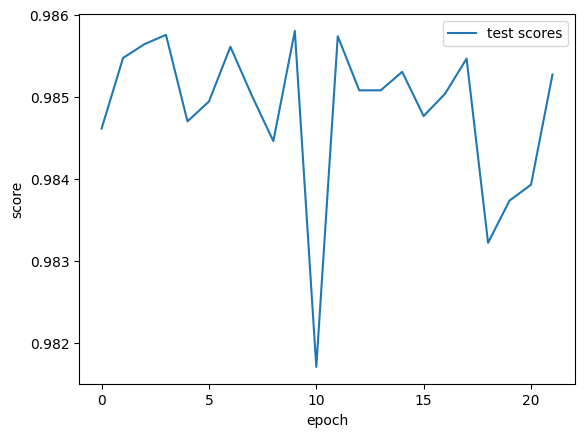

In [5]:
import matplotlib.pyplot as plt

complete_plot = False
    
model.load()
model.evaluate(dataset, show=True)
plt.plot(model.test_scores, label='test scores')
plt.legend()
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

## Inference on test audio

frame 0, time 0.00
Prediction: tensor([[0.9166, 0.0834]]), elapsed: 0.0032
frame 1, time 0.02
Prediction: tensor([[0.8708, 0.1292]]), elapsed: 0.0020
frame 2, time 0.05
Prediction: tensor([[0.8729, 0.1271]]), elapsed: 0.0020
frame 3, time 0.07
Prediction: tensor([[0.8718, 0.1282]]), elapsed: 0.0023
frame 4, time 0.09
Prediction: tensor([[0.8724, 0.1276]]), elapsed: 0.0020
frame 5, time 0.12
Prediction: tensor([[0.8726, 0.1274]]), elapsed: 0.0019
frame 6, time 0.14
Prediction: tensor([[0.8729, 0.1271]]), elapsed: 0.0019
frame 7, time 0.16
Prediction: tensor([[0.8729, 0.1271]]), elapsed: 0.0019
frame 8, time 0.19
Prediction: tensor([[0.8722, 0.1278]]), elapsed: 0.0019
frame 9, time 0.21
Prediction: tensor([[0.8718, 0.1282]]), elapsed: 0.0019
frame 10, time 0.23
Prediction: tensor([[0.8724, 0.1276]]), elapsed: 0.0021
frame 11, time 0.26
Prediction: tensor([[0.8717, 0.1283]]), elapsed: 0.0021
frame 12, time 0.28
Prediction: tensor([[0.8719, 0.1281]]), elapsed: 0.0019
frame 13, time 0.30
Pr

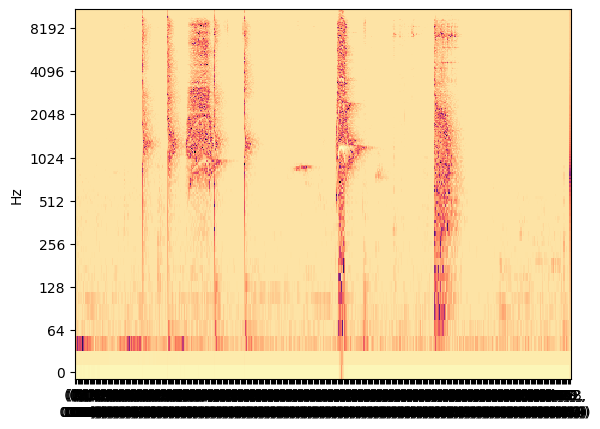

In [6]:
import torch
from utils import Audio, project_root
import time

def classify(window):
    with torch.no_grad():
        start = time.time()
        prediction = torch.softmax(model(window), dim=1)
        elapsed = time.time() - start
        predicted_class = torch.argmax(prediction).item()
        print(f"Prediction: {prediction}, elapsed: {elapsed:.4f}")
        return predicted_class


projroot = project_root()
audio = Audio(name="test4", datapath=f'{projroot}/data/whistle/raw/test')
for i in range(audio.S.shape[1]):
    window = torch.from_numpy(audio.S[:,i].reshape(1,1,513))
    print(f"frame {i}, time {audio.frame2time(i):.2f}")
    classify(window)
audio.freq_plot()

## Export to ONNX

In [7]:
from edge import ONNX

# onnx = ONNX(model)